In [1079]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1080]:
import warnings
warnings.filterwarnings('ignore')

In [1081]:
matplotlib.rcParams.update({'font.size': 14})

In [1082]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [1083]:
# Изменение типа столбцов в dataframe -- функция
def to_Str(df_, list):
    for i in list:
        df_[i] = df_[i].astype(str)
        
# создаем из категориальных столбцов с двумя значениями boolean столбец и меняем ему тип на int
def AB_to_NewIntColumns(df_, list, p):
    for i in list:
        df_[i+'_'] = df_[i].apply(lambda x: x==p)
        df[i+'_'] = df[i+'_'].astype(int)
        
# у категориальных столбцов с двумя значениями меняем тип на int
def AB_to_IntColumns(df_, list, p):
    for i in list:
        df_[i+'_'] = df_[i].apply(lambda x: x==p)
        df_[i+'_'] = df_[i+'_'].astype(int)
        df_[i] = df_[i+'_']
#         df_ = df_.drop([i+'_'],axis=1)

In [1084]:
# Обработка пропусков -- функции
def get_NaN_info(df_):
    return len(df_)-df_.count()

def set_NaN_median(df_, col1):
    df_.loc[df_[col1].isnull(), col1] = df[col1].median()

In [1085]:
def features_Stand(features_,X_):
    scaler = StandardScaler()
    X_train_scaled = X_.copy()
    X_train_scaled[features_] = scaler.fit_transform(X_train_scaled[features_])
    return X_train_scaled

In [1086]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [1087]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


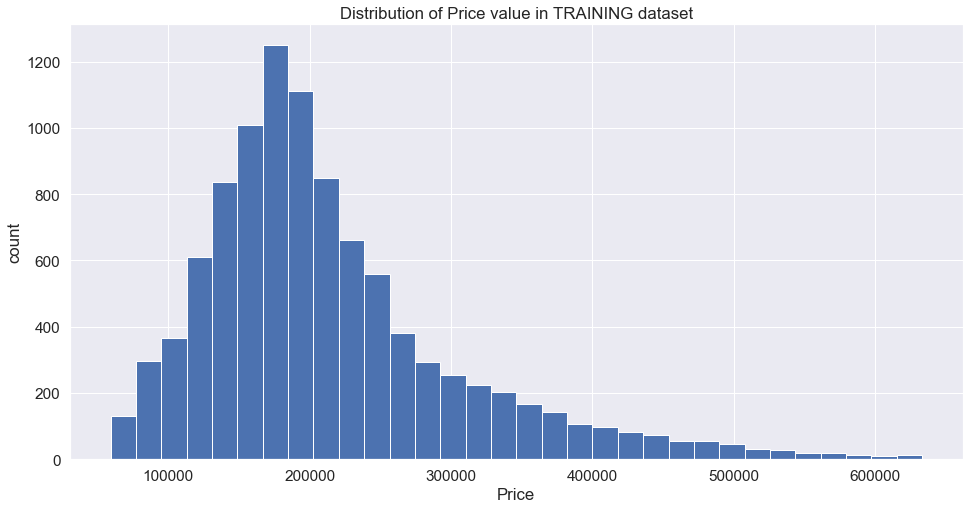

In [1088]:
plt.figure(figsize = (16, 8))

train['Price'].hist(bins=32)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price value in TRAINING dataset')
plt.show()

In [1089]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [1090]:
# num_features = train.select_dtypes(include=['float64', 'int64']).drop(['Price'],axis=1).drop(['Id'],axis=1)

In [1091]:
# num_features.describe()

In [1092]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

**Обработка пропусков и приведение типов**

In [1093]:
# to_Str(train,['Id','DistrictId'])
# to_Str(test,['Id','DistrictId'])
to_Str(train,['Id'])
to_Str(test,['Id'])
# test.dtypes

In [1094]:
set_NaN_median(test,'LifeSquare')
set_NaN_median(test,'Healthcare_1')
# get_NaN_info(test)

In [1095]:
set_NaN_median(train,'LifeSquare')
set_NaN_median(train,'Healthcare_1')
# get_NaN_info(train)

In [1096]:
# AB_to_NewIntColumns(df,['Ecology_2','Ecology_3','Shops_2'],'A')
# AB_to_IntColumns(df,['Ecology_2','Ecology_3','Shops_2'],'A')
AB_to_IntColumns(test,['Ecology_2','Ecology_3','Shops_2'],'A')
AB_to_IntColumns(train,['Ecology_2','Ecology_3','Shops_2'],'A')

In [1097]:
test['Shops_2'].value_counts()

0    4588
1     412
Name: Shops_2, dtype: int64

In [1098]:
train = train.drop(['Ecology_2_'],axis=1)
train = train.drop(['Ecology_3_'],axis=1)
train = train.drop(['Shops_2_'],axis=1)
test = test.drop(['Ecology_2_'],axis=1)
test = test.drop(['Ecology_3_'],axis=1)
test = test.drop(['Shops_2_'],axis=1)

test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,28.635576,5.976800,8.632000,12.601000,1984.392600,0.119874,0.009600,0.029800,24.933800,5406.900000,8.262600,601.250096,1.31940,4.242800,0.082400
std,44.179466,0.838594,19.092787,21.607115,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,949.111354,1.47994,4.777365,0.275001
min,0.000000,0.000000,1.378543,0.024161,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,-0.602239,0.00000,0.000000,0.000000
25%,21.000000,1.000000,41.906231,17.873731,1.000000,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.000000,-0.602239,0.00000,1.000000,0.000000
50%,37.000000,2.000000,52.921340,29.118838,6.000000,7.000000,12.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,0.000000
75%,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,0.000000
max,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [1099]:
# Обработка выбросов
def IQ_process(df_, column_):
    m = df_[column_].median()
    c = column_
    IQ=df_[c].describe()['75%']-df_[c].describe()['25%']
    low_border=df_[c].describe()['25%']-IQ*1.5
    high_border=df_[c].describe()['75%']+IQ*1.5
#     print(IQ,low_border,high_border)
    df_[(df_[c]<low_border)|(df_[c]>high_border)]
    df.loc[df['LifeSquare'] > 250, 'LifeSquare']

**Обработка выбросов**

In [1100]:
# IQ_process(train,'KitchenSquare')['KitchenSquare']
df_num_features = df.select_dtypes(include=['float64', 'int'])

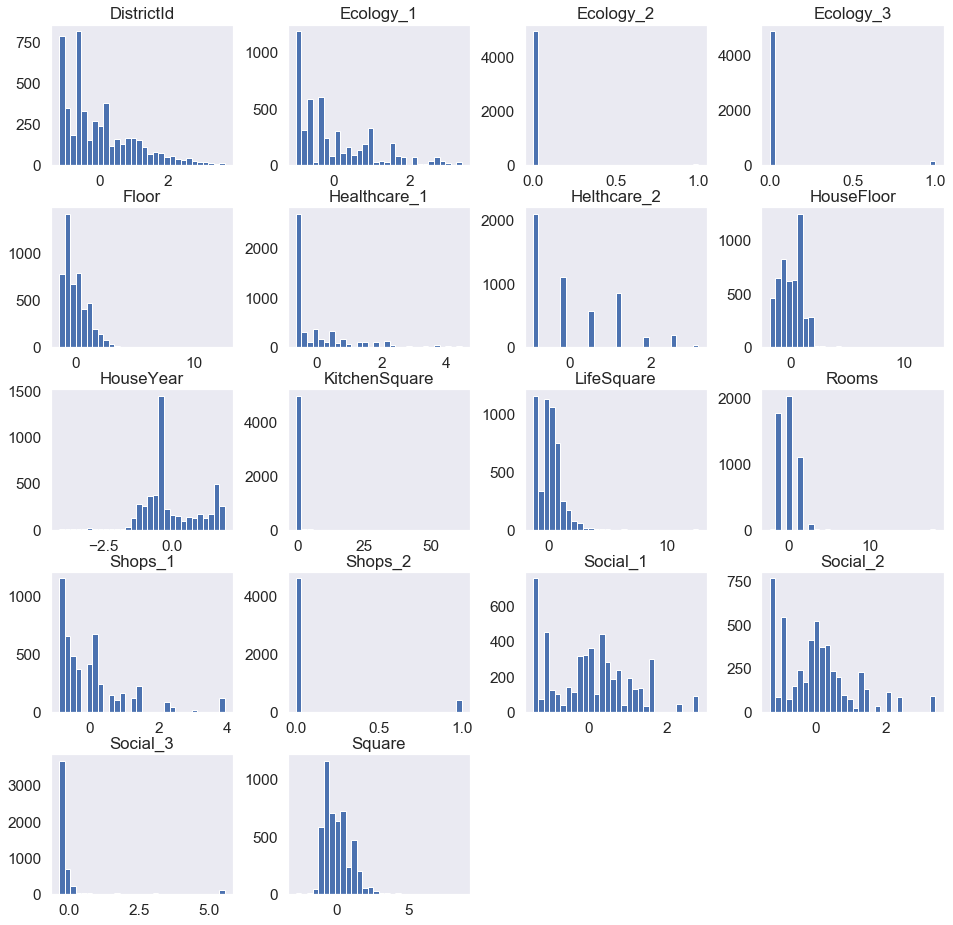

In [1101]:
df_num_features.hist(figsize=(16,16), bins=30, grid=False);

In [1102]:
# train.query('(LifeSquare > Square )')
train.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

**СТАНДАРТИЗАЦИЯ и подготовка данных для модели**

In [1103]:
feature_names = ['Id','DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1','Shops_2']
feature_names_without_id = feature_names.copy()
feature_names_without_id.remove('Id')
Xtrain = train[feature_names]
Xtest = test[feature_names]


In [1104]:
# feature_names_for_stand = df[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']


In [1105]:
#НЕ ЗАБЫТЬ СТАНДАРТИЗИРОВАТЬ ТЕСТОВЫЙ НАБОР
X2train = features_Stand(feature_names_for_stand, Xtrain)
X2train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,2.241762e-16,7.482237e-16,-2.578937e-16,-2.720046e-17,2.099404e-16,-1.426914e-16,1.001077e-15,2.580800e-16,5.593304e-17,0.009700,0.027500,-9.445500e-17,5.659084e-17,-8.172851e-16,-3.216871e-16,-1.040990e-15,-1.531331e-16,0.082500
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.098015,0.163543,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.275139
min,-1.156369e+00,-2.252016e+00,-2.620370e+00,-3.755446e-01,-2.196573e-01,-1.436150e+00,-1.860992e+00,-1.037540e-02,-9.986406e-01,0.000000,0.000000,-1.408132e+00,-1.293905e+00,-3.373466e-01,-6.380818e-01,-8.834798e-01,-8.804019e-01,0.000000
25%,-6.974994e-01,-1.060788e+00,-6.905269e-01,-1.500787e-01,-1.846427e-01,-8.637280e-01,-5.327028e-01,-1.005618e-02,-8.503701e-01,0.000000,0.000000,-1.065895e+00,-9.454794e-01,-3.373466e-01,-6.380818e-01,-8.834798e-01,-6.723330e-01,0.000000
50%,-3.304041e-01,1.304395e-01,-1.805738e-01,-5.348815e-03,-9.569499e-03,-2.913057e-01,5.764773e-02,-1.004122e-02,-3.649310e-01,0.000000,0.000000,1.785334e-02,-1.676170e-02,-2.534212e-01,-6.052556e-01,-2.139233e-01,-2.561952e-01,0.000000
75%,5.643907e-01,1.304395e-01,4.551713e-01,1.547603e-01,9.547440e-02,6.627314e-01,6.479983e-01,-9.921512e-03,6.463114e-01,0.000000,0.000000,6.452869e-01,4.679386e-01,-1.275331e-01,4.245103e-01,4.556332e-01,3.680115e-01,0.000000
max,3.638814e+00,2.038131e+01,2.776894e+01,9.543815e+01,7.029981e+01,6.386954e+00,1.540676e+01,9.999500e+01,3.386085e+00,1.000000,1.000000,2.812784e+00,3.427056e+00,5.579395e+00,4.563955e+00,3.133859e+00,3.905183e+00,1.000000


In [1107]:
X2test = features_Stand(feature_names_for_stand, Xtest)
X2test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,0.152140,0.107333,-0.343979,0.222042,0.002332,-0.480057,0.206083,-0.667299,1.585280,0,0,-0.794834,-0.660397,-0.304366,-0.634185,-0.891612,-0.888194,0
1,15856,0.514336,0.107333,0.671194,-1.324299,-0.500230,-0.480057,-1.708911,-0.398066,-0.367283,0,0,-1.080052,-0.986014,-0.220549,-0.634185,-0.891612,-0.469511,0
2,5480,3.140252,-1.085258,-2.244616,-0.587242,0.605406,-1.209627,-1.119682,-4.059632,-0.998468,0,0,0.288994,0.529306,3.299785,4.321053,2.487242,0.158513,0
3,15664,-0.096869,0.107333,0.869374,1.078700,0.303869,2.438224,1.384540,1.217331,-0.149940,0,0,-0.110311,-0.204634,-0.220549,-0.634185,1.135700,-0.260169,0
4,14275,-0.549613,-1.085258,-0.467364,0.682806,-0.500230,1.526261,0.648004,1.755796,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,-0.911809,1.299924,0.559661,1.026349,0.002332,-0.662450,-0.530453,-0.613452,-0.997055,0,0,0.631256,0.145323,-0.346275,-0.634185,-0.215841,-0.678852,0
4996,4695,-1.138181,-1.085258,-0.851246,-0.316062,0.404381,0.614298,0.648004,1.755796,-0.939144,0,0,-1.365270,-1.277354,-0.346275,-0.634185,-0.891612,-0.678852,0
4997,5783,-0.889172,1.299924,1.120571,0.909377,0.303869,2.620616,1.384540,0.248093,-0.242173,0,0,2.798913,3.396766,-0.262458,-0.634185,2.487242,2.251927,0
4998,4780,0.242689,0.107333,1.301969,-1.324299,-0.600742,-0.844842,-1.856218,-0.398066,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1


In [1108]:
y = train['Price']

# X - нестандартизированныее, X2 - стандартизированные
X_train, X_valid, y_train, y_valid = train_test_split(X2train.drop(['Id'],axis=1), y, test_size=0.33, random_state=42)


**СТРОИМ МОДЕЛИ**

**Liner Regression**

In [1109]:
# Liner Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1110]:
y_train

8371    290331.414171
5027    412668.437016
9234    109451.982259
3944    246354.082650
6862    217344.455089
            ...      
5734    150136.610509
5191    328680.869407
5390    255102.406709
860     182236.048759
7270    443365.496451
Name: Price, Length: 6700, dtype: float64

R2:	0.501
MAE:	44904.368
MSE:	4305386990.895


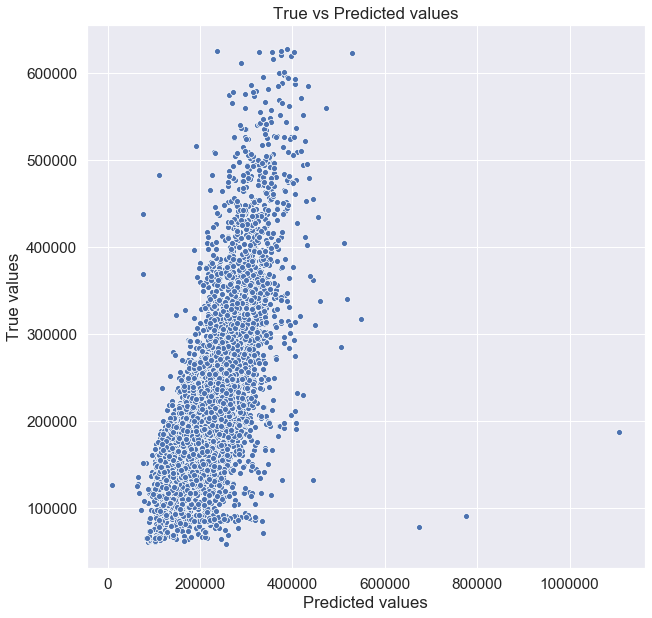

In [1111]:
y_train_preds = lr.predict(X_train)
y_train_preds
evaluate_preds(y_train, y_train_preds) #def evaluate_preds(true_values, pred_values):

In [1112]:
# check_train = pd.DataFrame({
#     "y_train": y_train,
#     "y_train_preds": y_train_preds.flatten(),
# })
# check_train["error"] = check_train["y_train_preds"] - check_train["y_train"]
# check_train

In [1113]:
y_valid_preds = lr.predict(X_valid)
y_valid_preds


array([174539.53101881, 251460.69470389, 244333.41016819, ...,
       273485.04751691, 226603.91281792, 152561.35989494])

In [1114]:
check_valid = pd.DataFrame({
    "y_valid": y_valid,
    "y_valid_preds": y_valid_preds.flatten(),
})
check_valid["error"] = check_valid["y_valid_preds"] - check_valid["y_valid"]
check_valid

,y_valid,y_valid_preds,error
6252,181530.459031,174539.531019,-6990.928012
4684,260456.004692,251460.694704,-8995.309988
1731,219945.304640,244333.410168,24388.105528
4742,66883.280318,97327.086422,30443.806104
4521,114086.065201,174549.695836,60463.630635
...,...,...,...
1744,328320.549574,322732.502064,-5588.047510
9754,166893.709294,194664.093366,27770.384072
6094,223249.331500,273485.047517,50235.716017
8781,190937.730277,226603.912818,35666.182541


R2:	0.47
MAE:	45218.629
MSE:	4562395985.471


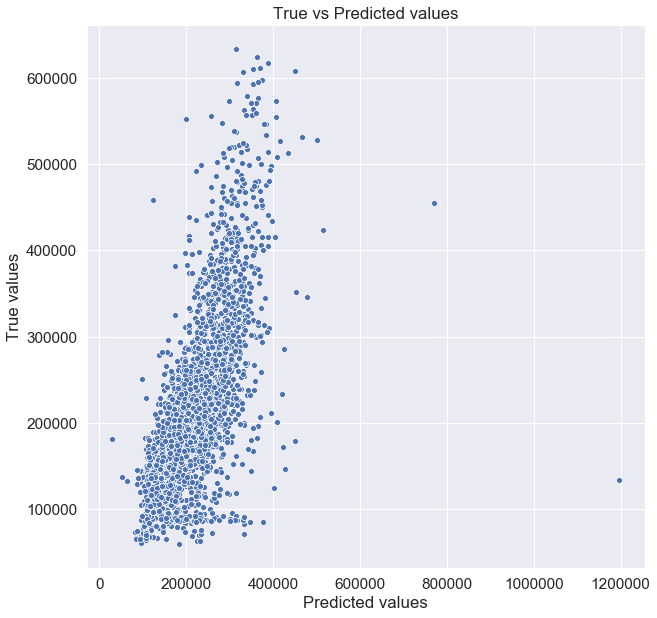

In [1115]:
evaluate_preds(y_valid, y_valid_preds)

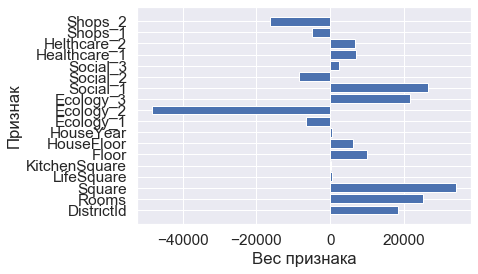

In [1116]:
plt.barh(feature_names_without_id, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

**РАСЧЕТ ПРОГНОЗНЫХ ДЛЯ ТЕСТА**

In [1117]:
X2test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,0.152140,0.107333,-0.343979,0.222042,0.002332,-0.480057,0.206083,-0.667299,1.585280,0,0,-0.794834,-0.660397,-0.304366,-0.634185,-0.891612,-0.888194,0
1,15856,0.514336,0.107333,0.671194,-1.324299,-0.500230,-0.480057,-1.708911,-0.398066,-0.367283,0,0,-1.080052,-0.986014,-0.220549,-0.634185,-0.891612,-0.469511,0
2,5480,3.140252,-1.085258,-2.244616,-0.587242,0.605406,-1.209627,-1.119682,-4.059632,-0.998468,0,0,0.288994,0.529306,3.299785,4.321053,2.487242,0.158513,0
3,15664,-0.096869,0.107333,0.869374,1.078700,0.303869,2.438224,1.384540,1.217331,-0.149940,0,0,-0.110311,-0.204634,-0.220549,-0.634185,1.135700,-0.260169,0
4,14275,-0.549613,-1.085258,-0.467364,0.682806,-0.500230,1.526261,0.648004,1.755796,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,-0.911809,1.299924,0.559661,1.026349,0.002332,-0.662450,-0.530453,-0.613452,-0.997055,0,0,0.631256,0.145323,-0.346275,-0.634185,-0.215841,-0.678852,0
4996,4695,-1.138181,-1.085258,-0.851246,-0.316062,0.404381,0.614298,0.648004,1.755796,-0.939144,0,0,-1.365270,-1.277354,-0.346275,-0.634185,-0.891612,-0.678852,0
4997,5783,-0.889172,1.299924,1.120571,0.909377,0.303869,2.620616,1.384540,0.248093,-0.242173,0,0,2.798913,3.396766,-0.262458,-0.634185,2.487242,2.251927,0
4998,4780,0.242689,0.107333,1.301969,-1.324299,-0.600742,-0.844842,-1.856218,-0.398066,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1


In [1118]:
y_test_preds = lr.predict(X2test.drop(['Id'], axis=1))
y_test_preds


array([172666.80221744, 207171.40170398, 211896.33402599, ...,
       354298.33279302, 200548.27607547, 227658.40326464])

In [1017]:
X2test["Price"] = lr.predict(X2test.drop(['Id'], axis=1))

In [1018]:
def SAVE_TO_FILE(df_, modelName):
    df_.loc[:, ['Id', 'Price']].to_csv('mmingalov_kaggle_predictions(' + modelName + ').csv', index=False)

In [1019]:
SAVE_TO_FILE(X2test,'lr')

**Random Forest**

In [1119]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=18, random_state=42, max_features=7)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

R2:	0.958
MAE:	11988.838
MSE:	362500638.879


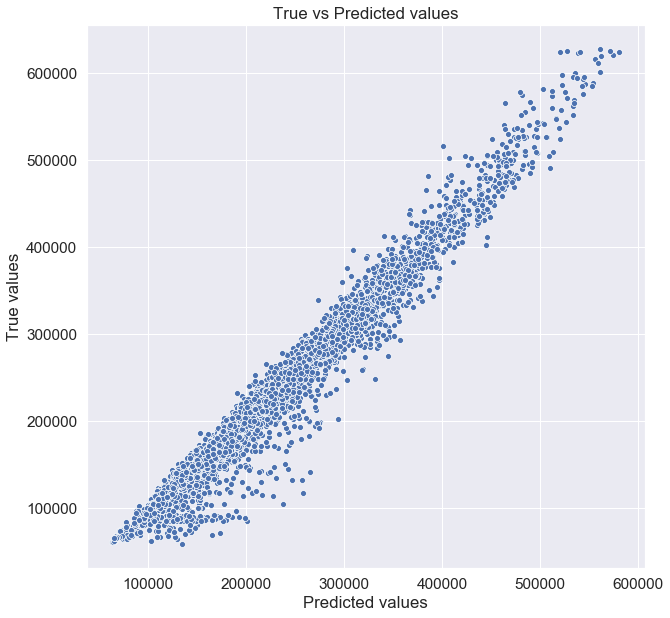

array([279958.15945303, 362490.96160325, 113772.84304955, ...,
       244148.44983308, 193372.83185426, 427067.30952012])

In [1120]:
y_train_preds = rf.predict(X_train)
evaluate_preds(y_train, y_train_preds)
y_train_preds

R2:	0.73
MAE:	28109.845
MSE:	2324224671.33


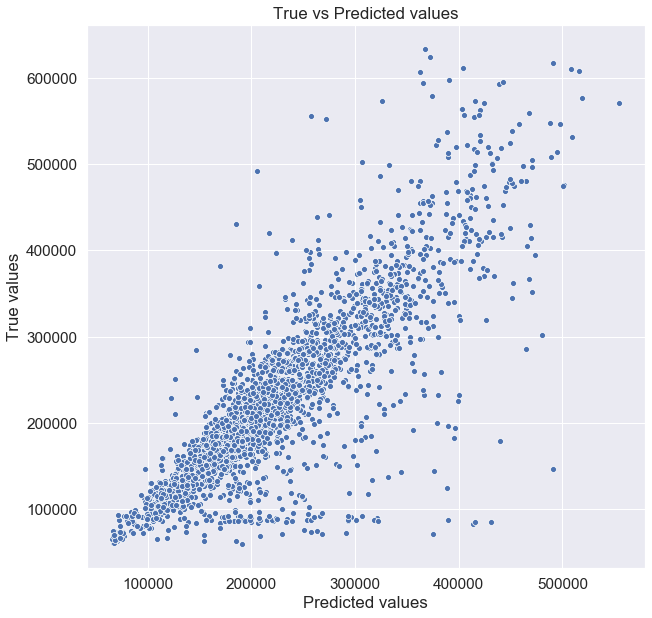

In [1121]:
y_valid_preds = rf.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

In [1122]:
# check_train = pd.DataFrame({
#     "y_train": y_train,
#     "y_train_preds": y_train_preds.flatten(),
# })
# check_train["error"] = check_train["y_train_preds"] - check_train["y_train"]
# check_train

In [1124]:
df = X2test.drop(['Price'],axis=1).drop(['Id'],axis=1)


KeyError: "['Price'] not found in axis"

In [1125]:
X2test['Price'] = rf.predict(df)

In [1126]:
X2test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,0.152140,0.107333,-0.343979,0.222042,0.002332,-0.480057,0.206083,-0.667299,1.585280,0,0,-0.794834,-0.660397,-0.304366,-0.634185,-0.891612,-0.888194,0,193716.487588
1,15856,0.514336,0.107333,0.671194,-1.324299,-0.500230,-0.480057,-1.708911,-0.398066,-0.367283,0,0,-1.080052,-0.986014,-0.220549,-0.634185,-0.891612,-0.469511,0,244032.934985
2,5480,3.140252,-1.085258,-2.244616,-0.587242,0.605406,-1.209627,-1.119682,-4.059632,-0.998468,0,0,0.288994,0.529306,3.299785,4.321053,2.487242,0.158513,0,272379.449817
3,15664,-0.096869,0.107333,0.869374,1.078700,0.303869,2.438224,1.384540,1.217331,-0.149940,0,0,-0.110311,-0.204634,-0.220549,-0.634185,1.135700,-0.260169,0,364138.096906
4,14275,-0.549613,-1.085258,-0.467364,0.682806,-0.500230,1.526261,0.648004,1.755796,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1,153263.941543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,-0.911809,1.299924,0.559661,1.026349,0.002332,-0.662450,-0.530453,-0.613452,-0.997055,0,0,0.631256,0.145323,-0.346275,-0.634185,-0.215841,-0.678852,0,282378.051517
4996,4695,-1.138181,-1.085258,-0.851246,-0.316062,0.404381,0.614298,0.648004,1.755796,-0.939144,0,0,-1.365270,-1.277354,-0.346275,-0.634185,-0.891612,-0.678852,0,139094.258110
4997,5783,-0.889172,1.299924,1.120571,0.909377,0.303869,2.620616,1.384540,0.248093,-0.242173,0,0,2.798913,3.396766,-0.262458,-0.634185,2.487242,2.251927,0,343957.050688
4998,4780,0.242689,0.107333,1.301969,-1.324299,-0.600742,-0.844842,-1.856218,-0.398066,-0.397445,0,0,-1.308227,-1.186699,-0.304366,-0.634185,-0.891612,-0.888194,1,211703.170918


In [1127]:
SAVE_TO_FILE(X2test,'rf+')

**Gradient Boosting**

In [1128]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.776
MAE:	28721.591
MSE:	1936232852.424


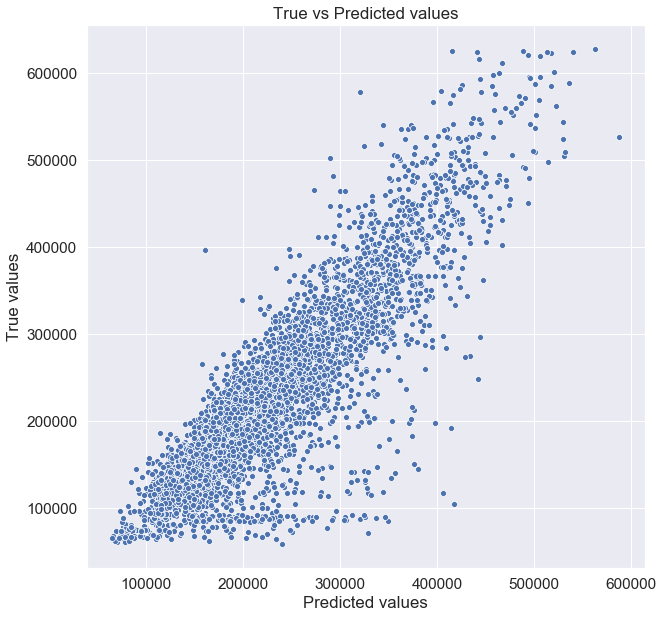

In [1129]:
y_train_preds = gb.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.707
MAE:	30841.584
MSE:	2524370070.141


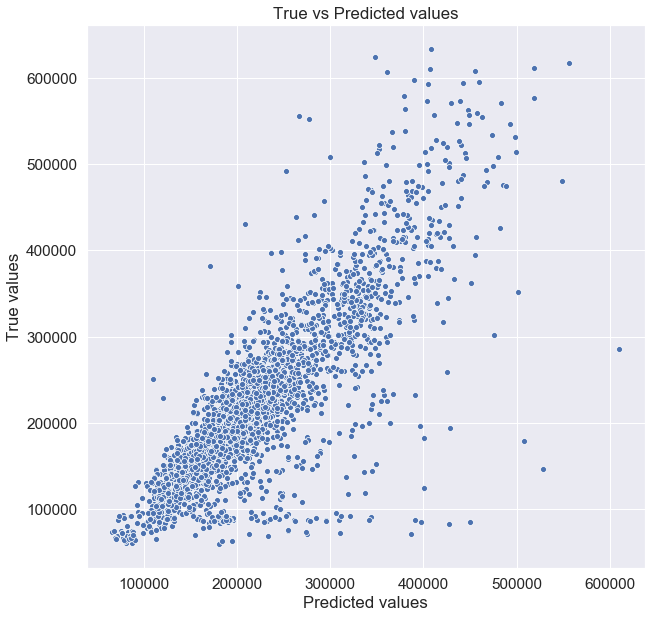

In [1130]:
y_valid_preds = gb.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

In [1131]:
df = X2test.drop(['Price'],axis=1).drop(['Id'],axis=1)
X2test['Price'] = gb.predict(df)

In [1132]:
SAVE_TO_FILE(X2test,'gb')

**НАСТРОЙКА И ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ**

In [1053]:
gb_model = GradientBoostingRegressor(random_state=22)
gb_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=22, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1054]:
#%%time
params = {'n_estimators':[128, 192, 256], 
          'max_depth':[2, 4, 6]}

gs = GridSearchCV(gb_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=22, shuffle=True), n_jobs=-1)
x = X2train.drop(['Id'],axis=1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=22, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                            

In [1055]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 128}

In [1056]:
gs.best_score_

0.7346667293889588

**Обучение и оценка модели**

In [1057]:
gb = GradientBoostingRegressor(n_estimators=128, max_depth=6, random_state=22)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=128,
                          n_iter_no_change=None, presort='auto',
                          random_state=22, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.909
MAE:	18417.373
MSE:	777940279.846


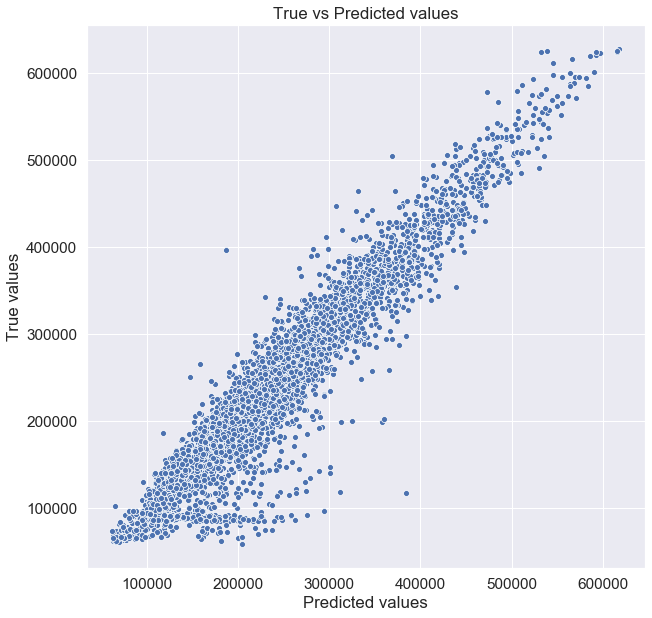

In [1058]:
y_train_preds = gb.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.746
MAE:	27292.733
MSE:	2239869084.571


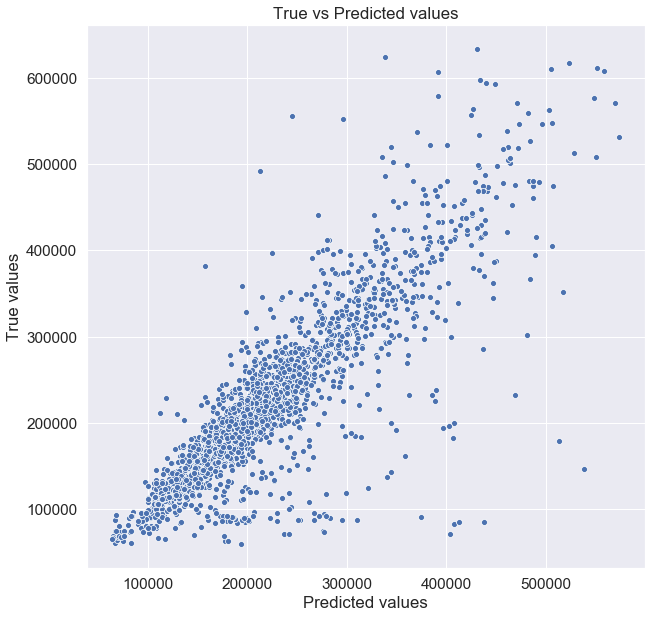

In [1059]:
y_valid_preds = gb.predict(X_valid)
evaluate_preds(y_valid, y_valid_preds)

In [1060]:
df = X2test.drop(['Price'],axis=1).drop(['Id'],axis=1)
X2test['Price'] = gb.predict(df)

In [1061]:
SAVE_TO_FILE(X2test,'gb-final2')